# Part I - Ford GoBike Analysis
## by Chelagat Pauline Gechure

## Table of Contents
<ul>
<li><a href="#intro">I. Introduction</a></li>
<li><a href="#wrangling">II. Preliminary Wrangling</a></li>
<li><a href="#unieda">III. Univariate Exploration</a></li>
<li><a href="#bieda">IV. Bivariate Exploration</a></li>    
<li><a href="#multieda">V. Multivariate Exploration</a></li>
<li><a href="#conclusion">VI. Conclusion</a></li>
</ul>


<a id='intro'></a>
## Introduction

> **About Ford GoBike Bike Sharing**

Ford GoBike implemented in 2013 is a regional bike-sharing network aimed at enhancing accessible, affordable and sustainable  transportation in the San Francisco Bay Area. Lyft rebranded the San Francisco Bay Area's bike-share program from Ford GoBike to Bay Wheels in 2017 and effected the change in June 2019. 

The bikes are designed for the hilly urban environment are therefore comfortable and easy to ride. Riders both subscribers/member and customers/casual, are able to access the bikes from various stations in the city. 

Ford GoBike System Data includes information about individual rides made in a bike sharing system in the San Francisco Bay Area. The data provided [here](https://www.google.com/url?q=https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv&sa=D&source=editors&ust=1658068876854626&usg=AOvVaw3ly7YsFLadhywo24nm_p_8) covers February 2019. The desire is to focus on a complete year(January 2019 - December 2019) and the files can be downoaded from [here](https://www.lyft.com/bikes/bay-wheels/system-data).

> **Column mapping:**

- duration_sec
- start_time
- end_time
- start_station_id
- start_station_name
- start_station_latitude
- start_station_longitude
- end_station_id
- end_station_name
- end_station_latitude
- end_station_longitude
- bike_id
- user_type
- member_birth_year
- member_gender
- bike_share_for_all_trip  

<a id='wrangling'></a>
## II. Preliminary Wrangling

### a. Gathering Data

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import requests
import os
from zipfile import ZipFile
from io import BytesIO

import glob
import datetime

In [2]:
#Creating a folder using OS method
folder_name = '2019_ford_gobike_data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
# Getting the URLs for 2019 Ford GoBike data
rides_2019 = ['https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip']


In [4]:
# Creating the request to download and unzip the files
#Downloading the file 
for url in rides_2019:
    reponse = requests.get(url)
    # Unzipping the file and storing in the new folder
    zip_file = ZipFile(BytesIO(reponse.content))    
    zip_file.extractall('2019_ford_gobike_data')

In [5]:
# Confirming that the unzipped files are present in the created folder
for rides in glob.glob('2019_ford_gobike_data/*.csv'):
    print (rides)

2019_ford_gobike_data/201902-fordgobike-tripdata.csv
2019_ford_gobike_data/201906-baywheels-tripdata.csv
2019_ford_gobike_data/201907-baywheels-tripdata.csv
2019_ford_gobike_data/201905-baywheels-tripdata.csv
2019_ford_gobike_data/201901-fordgobike-tripdata.csv
2019_ford_gobike_data/201910-baywheels-tripdata.csv
2019_ford_gobike_data/201909-baywheels-tripdata.csv
2019_ford_gobike_data/201912-baywheels-tripdata.csv
2019_ford_gobike_data/201904-fordgobike-tripdata.csv
2019_ford_gobike_data/201911-baywheels-tripdata.csv
2019_ford_gobike_data/201903-fordgobike-tripdata.csv
2019_ford_gobike_data/201908-baywheels-tripdata.csv


In [6]:
# Merging all the files into one dataset
all_rides = pd.concat([pd.read_csv(file) for file in glob.glob('2019_ford_gobike_data/*.csv')],
                      ignore_index = True, sort = False)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [7]:
# Exporting the complete dataset
all_rides.to_csv('all_2019_rides.csv', index = False)

### b. Assessing Data

In [8]:
#Loading the full dataset
ride = pd.read_csv('all_2019_rides.csv')
ride.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,No,NaN
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,No,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,No,NaN
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,No,NaN
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Yes,NaN


In [9]:
#Getting the dataset dimensions
ride.shape

(2506983, 15)

In [10]:
#Getting information about the dataset
ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
rental_access_method       object
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [11]:
#checking for duplicate entries
ride.duplicated().sum()

0

In [12]:
#Checking the total number of observations with null entries
ride.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [13]:
#Calculating the percentage of missing values per column
ride.isnull().sum()*100/len(ride)

duration_sec                0.000000
start_time                  0.000000
end_time                    0.000000
start_station_id            3.220365
start_station_name          3.196392
start_station_latitude      0.000000
start_station_longitude     0.000000
end_station_id              3.306843
end_station_name            3.284825
end_station_latitude        0.000000
end_station_longitude       0.000000
bike_id                     0.000000
user_type                   0.000000
bike_share_for_all_trip     9.703257
rental_access_method       95.179943
dtype: float64

In [14]:
ride['start_month'] = pd.to_datetime(ride['start_time']).dt.month_name()
ride['start_month'].value_counts()

July         258102
March        256299
October      239895
April        239111
September    217986
August       210563
January      192082
June         191772
November     185496
February     183412
May          182163
December     150102
Name: start_month, dtype: int64

In [15]:
dec = ride.loc[ride['start_month'] == 'December']
dec.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            21019
start_station_name          21015
start_station_latitude          0
start_station_longitude         0
end_station_id              21347
end_station_name            21345
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
bike_share_for_all_trip    150102
rental_access_method       122421
start_month                     0
dtype: int64

In [16]:
#Checking the range of rides duration in seconds
print(ride['duration_sec'].describe())
print('There are', ride['duration_sec'].value_counts()[ride.duration_sec.min()], 'with rides that are one minute long.')
print('There longest ride is',ride.duration_sec.max()/60/60, 'hours long.')


count    2.506983e+06
mean     8.076483e+02
std      1.974714e+03
min      6.000000e+01
25%      3.590000e+02
50%      5.710000e+02
75%      8.870000e+02
max      9.121100e+05
Name: duration_sec, dtype: float64
There are 38 with rides that are one minute long.
There longest ride is 253.363888889 hours long.


In [17]:
# Checking the unique values in user_type column
ride['user_type'].value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

In [18]:
# Checking the unique values in bike_share_for_all_trip column
ride['bike_share_for_all_trip'].value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

**Quality issues**

- Some of the columns contain missing values. The `rental_access_method` column contains 95% missing value. The `bike_share_for_all_trip` column contains all missing values for the month of December.
-  Some of the rows contain missing values i.e `start_station_id`, `start_station_name`,`end_station_id `, `end_station_name`. (Completeness issue)
- Errenous datatype for `start_time`, it is a string should be a datetime. (Validity issue)
- Errenous datatype for `end_time`, it is a string should be a datetime. (Validity issue)
- Errenous datatype for `start_station_id`, it is a float should be a string. (Validity issue)
- Errenous datatype for `end_station_id`, it is a float should be a string. (Validity issue)
- Errenous datatype for `bike_id`, it is a integer should be a string. (Validity issue)
- Errenous datatype for `user_type`, it is a float should be a integer. (Validity issue)
- Errenous datatype for `bike_share_for_all_trip`, it is an object but should be a categorical. (Validity issue)
- 38 rides were one minute long which is not practical and the longest ride was more than 10 days long. These kinds of rides are not accurate.
- The `start_time` and `end_time` columns contain all date and time information. The month, date, day of the week and hour to be extracted.
- The `duration_sec` column is in second and would need to be converted to minutes.


### c. Cleaning  Data

In [19]:
# Creating a copy of the original dataset to clean.
ride_clean = ride.copy()
print(ride_clean.shape)

(2506983, 16)


#### Issue 1 & 2: Missing values
- Some of the columns contain missing values i.e `start_station_id`, `start_station_name`,`end_station_id `, `end_station_name`, `bike_share_for_all_trip` and `rental_access_method`. (Completeness issue)

**Define**: Drop the rows with null values as they are less than 10% of the entire dataset and drop the `rental_access_method` column as 95% of the values are missing.

**Code**:

In [20]:
# Dropping the rental_access_method column
ride_clean.drop(['start_station_id','start_station_name','end_station_id', 
                 'end_station_name','rental_access_method', 'bike_share_for_all_trip'], axis = 1, inplace = True)

#df.drop(['C', 'D'], axis=1)
#del ride_clean['rental_access_method', 'bike_share_for_all_trip']

# Dropping rows with null values
#ride_clean.dropna(inplace = True)

**Test**

In [21]:
# Confirming that the columns have been dropped
ride_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_latitude',
       'start_station_longitude', 'end_station_latitude',
       'end_station_longitude', 'bike_id', 'user_type', 'start_month'],
      dtype='object')

In [22]:
ride_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_latitude     0
start_station_longitude    0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
start_month                0
dtype: int64

#### Issue 2: Columns missing values
- Some of the columns contain missing values i.e `start_station_id`, `start_station_name`,`end_station_id `, `end_station_name`, `bike_share_for_all_trip` and `rental_access_method`. (Completeness issue)

**Define**: Drop the rows with null values as they are less than 10% of the entire dataset and drop the `rental_access_method` column as 95% of the values are missing.

**Code**:

In [23]:
#Confirming that columns with mostly values have been dropped
print(ride_clean.shape)
ride_clean.isnull().sum()

(2506983, 10)


duration_sec               0
start_time                 0
end_time                   0
start_station_latitude     0
start_station_longitude    0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
start_month                0
dtype: int64

#### Issue 3 & 4: Errenous datatype
- Errenous datatype for `start_time` and `end_time`, they are in string forman and should be datetime. (Validity issue).

**Define**: Convert `start_time` and `end_time` to datetime format.

**Code**:

In [24]:
#Changing the start_time and end_time columns to datetime format.
ride_clean['start_time'] = pd.to_datetime(ride_clean['start_time'])
ride_clean['end_time'] = pd.to_datetime(ride_clean['end_time'])

#ride_clean['start_time'] = ride_clean['start_time'].astype('datetime64[ns]')
#ride_clean['end_time'] = ride_clean['end_time'].astype('datetime64[ns]')

**Test**

In [25]:
#Confirming that the coluns have been changed to datetime type
ride_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 10 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_latitude     float64
start_station_longitude    float64
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
start_month                object
dtypes: datetime64[ns](2), float64(4), int64(2), object(2)
memory usage: 191.3+ MB


#### Issue 5,6 & 7: Errenous datatype
- Errenous datatype for `start_station_id`, `end_station_id` and `bike_id` they are floats and should be strings. (Validity issue).

**Define**: Convert `start_station_id`, `end_station_id` and `bike_id` to string format using astype.

**Code**:

In [26]:
# Changing the `start_station_id`, `end_station_id` and `bike_id` columns to string format.
for str_col in ['bike_id']:
    ride_clean[str_col] = ride_clean[str_col].astype(str)

**Test**

In [27]:
#Confirming that the columns have been changed to datetime type
ride_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 10 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_latitude     float64
start_station_longitude    float64
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
start_month                object
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 191.3+ MB


#### Issue 8: Extracting year, month, date, day of the week and hour.
- The start_time and end_time columns contain all date and time information. The year, month, date, day of the week and hour to be extracted.

**Define**: Extracting the year, month with df.to_period and dropping the initial columns.

**Code**:

In [28]:
# Extracting the month, date, day of the week and hour from the start_time column
ride_clean['start_month'] = pd.to_datetime(ride_clean['start_time']).dt.month_name()
ride_clean['start_date'] = pd.to_datetime(ride_clean['start_time']).dt.day
ride_clean['start_day'] = pd.to_datetime(ride_clean['start_time']).dt.day_name()
ride_clean['start_hour'] = pd.to_datetime(ride_clean['start_time']).dt.hour


In [29]:
# Extracting the month, date, day of the week and hour from the end_time column
ride_clean['end_month'] = pd.to_datetime(ride_clean['end_time']).dt.month_name()
ride_clean['end_date'] = pd.to_datetime(ride_clean['end_time']).dt.day
ride_clean['end_day'] = pd.to_datetime(ride_clean['end_time']).dt.day_name()
ride_clean['end_hour'] = pd.to_datetime(ride_clean['end_time']).dt.hour


**Test**

In [30]:
# Confirming that the start and end months, date, day of the week and hour have been extracted.
ride_clean.sample(3)

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,start_month,start_date,start_day,start_hour,end_month,end_date,end_day,end_hour
853315,461,2019-01-27 21:43:52.703,2019-01-27 21:51:34.155,37.852477,-122.270213,37.855783,-122.283127,2195,Subscriber,January,27,Sunday,21,January,27,Sunday,21
867414,485,2019-01-25 16:06:34.864,2019-01-25 16:14:40.665,37.868813,-122.258764,37.871719,-122.273068,3567,Subscriber,January,25,Friday,16,January,25,Friday,16
1110357,1244,2019-10-18 09:23:27.308,2019-10-18 09:44:11.478,37.751819,-122.426614,37.767045,-122.390833,11671,Subscriber,October,18,Friday,9,October,18,Friday,9


#### Issue 9: Errenous datatype
- Errenous datatype for `user_type` and `bike_share_for_all_trip` are object but should categorical variables. (Validity issue)

**Define**: Convert `user_type` and `bike_share_for_all_trip` to category format using astype.

**Code**:

In [31]:
# Changing the columns to categorical format.
for col in ['user_type', 'start_month', 'start_date', 'start_day', 'start_hour',
            'end_month','end_date', 'end_day', 'end_hour']:
    ride_clean[col] = ride_clean[col].astype('category')

**Test**

In [32]:
# Confirming that the member_birth_year column has been converted to integer
ride_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 17 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_latitude     float64
start_station_longitude    float64
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
start_month                category
start_date                 category
start_day                  category
start_hour                 category
end_month                  category
end_date                   category
end_day                    category
end_hour                   category
dtypes: category(9), datetime64[ns](2), float64(4), int64(1), object(1)
memory usage: 174.5+ MB


#### Issue 10: Inaccurate ride durations
- 38 rides were one minute long which is not practical and the longest ride was more than 10 days long

**Define**: Remove rides that have the minumum and maximum durations.

**Code**:

In [33]:
# Removing rides that have the least duration(60 seconds)
ride_clean = ride_clean[ride_clean.duration_sec != ride.duration_sec.min()]

#Removing the longest ride
ride_clean = ride_clean[ride_clean.duration_sec != ride.duration_sec.max()]

**Test**

In [34]:
# Confirming that the shortest and longest rides have been removed
ride_clean.duration_sec.describe()

count    2.506944e+06
mean     8.072962e+02
std      1.888989e+03
min      6.100000e+01
25%      3.590000e+02
50%      5.710000e+02
75%      8.870000e+02
max      8.623000e+04
Name: duration_sec, dtype: float64

#### Issue 11: Converting the duration column to minutes
- The `duration_sec` column is in second and would need to be converted to minutes.

**Define**: Create a column with the duration in minutes

**Code**:

In [35]:
# Calculating the duration in minutes and storing in a new variable
ride_clean['duration_min'] = (ride_clean['duration_sec']/60).astype(float)
ride_clean['duration_hours'] = (ride_clean['duration_min']/60).astype(float)

# Deleting the duration_sec column
# Also dropping start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude
ride_clean.drop(labels =['duration_sec','start_time', 'end_time','start_station_latitude',
                         'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis = 1, inplace = True)

In [36]:
ride_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506944 entries, 0 to 2506982
Data columns (total 12 columns):
bike_id           object
user_type         category
start_month       category
start_date        category
start_day         category
start_hour        category
end_month         category
end_date          category
end_day           category
end_hour          category
duration_min      float64
duration_hours    float64
dtypes: category(9), float64(2), object(1)
memory usage: 98.0+ MB


### d. Storing and loading cleaned data

In [37]:
#Storing the cleaned data
ride_clean.to_csv('2019_ford_gobikes_clean_data.csv', index = False, encoding = 'utf-8')

#Loading the cleaned data
df = pd.read_csv('2019_ford_gobikes_clean_data.csv')

In [38]:
# Datatypes formats are lost during storage therefore datatypes have to be changed after loading the cleaned dataset.
# Changing the columns to categorical format.
for cat_col in ['user_type','start_month', 'start_date', 'start_day', 'start_hour',
                'end_month','end_date', 'end_day', 'end_hour']:
    df[cat_col] = df[cat_col].astype('category')
    
# Changing the columns to string format.
for str_col in ['bike_id']:
    df[str_col] = df[str_col].astype(str)

In [39]:
print(df.shape)

(2506944, 12)


In [40]:
#Confirming that the datatypes are changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506944 entries, 0 to 2506943
Data columns (total 12 columns):
bike_id           object
user_type         category
start_month       category
start_date        category
start_day         category
start_hour        category
end_month         category
end_date          category
end_day           category
end_hour          category
duration_min      float64
duration_hours    float64
dtypes: category(9), float64(2), object(1)
memory usage: 78.9+ MB


#### Dateset structure:

The cleaned dataset has 2,506,944 observations and 12 columns covering 2019 rides in San Francisco Bay Area. The columns generally consist of station information, type of user, date and time of ride and the duration of the ride.


#### Main features of interest:

- Which type os users have the most and longest bike rides?
- When are most trips taken in terms of time of day, day of the week, or month of the year?
- How long does the average trip take? Average duration of trips?
- What factors influence the duration of a ride.
- Does the above depend on if a user is a subscriber or customer?

The type of user, date and time of ride and the duration of the ride information are the most relevant for answering these questions of interest.

<a id='unieda'></a>
## III. Univariate Exploration

**1. Which types of users use the bikes more?**

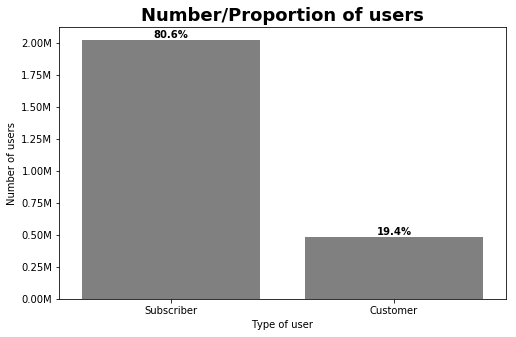

In [41]:
#Calculating the number of rides per day
user_counts = df['user_type'].value_counts()

#Getting the total number of rides in all the days
total_users = df['user_type'].value_counts().sum()

#Creating the order to be used for plotting
user_order = ['Subscriber', 'Customer']

# Plotting the graph
fig, ax = plt.subplots(figsize = (8,5))
g = sb.countplot(data=df, x='user_type', color = 'grey', order = user_order)
plt.title('Number/Proportion of users', fontsize=18, fontweight='bold')
plt.xlabel('Type of user')
plt.ylabel('Number of users');

# Get the current tick locations and labels
locs, labels = plt.xticks(rotation=0) 

#Formating the y-axis labels
ylabels = ['{:,.2f}'.format(x) + 'M' for x in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/total_users)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black', verticalalignment = 'bottom', fontweight = 'semibold')

**Observation**: Subscribers(those who have signed up) account for more than 80% of annual bikes rides. This is a substantial number of users compares to customers who only account for less than 20% of all rides in 2019. As a business strategy, users who are subscribers are profitable compared to customers.

**2. Which month/s has the most bikes rides?**

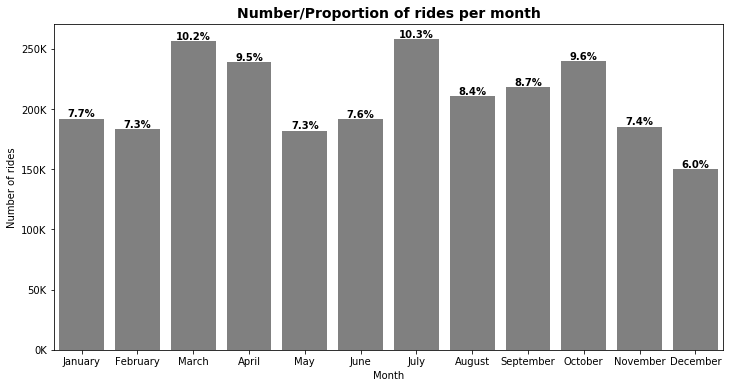

In [42]:
#Calculating the number of rides per day
month_counts = df['start_month'].value_counts()

#Getting the total number of rides in all the days
month_users = df['start_month'].value_counts().sum()

#Creating the order to be used for plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Plotting the graph
plt.figure(figsize = (12, 6))
g = sb.countplot(data=df, x='start_month', color = 'grey', order = month_order)
plt.title('Number/Proportion of rides per month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of rides');

# Get the current tick locations and labels
locs, labels = plt.xticks(rotation=0) 

#Formating the y-axis labels
ylabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabels)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = month_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/month_users)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black', va = 'bottom', fontweight = 'semibold')

**Observations**: March, April, July, August, September, October are the top 6 months with the highest number of bikes rides. Of importance to note, July through October coincide with summer and autumn which are characterized by warm sunny days and clear nights conducive for tourism.

**3. Which day/s has the most bikes rides?**

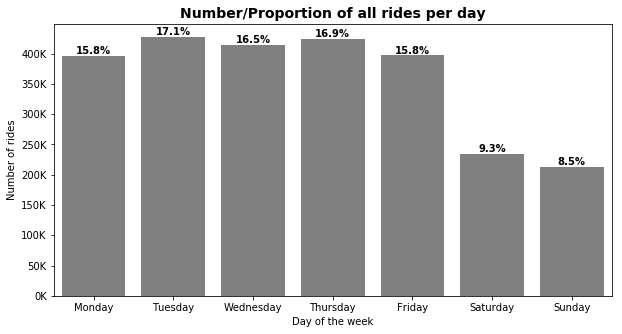

In [43]:
#Calculating the number of rides per day
day_counts = df['start_day'].value_counts()

#Getting the total number of rides in all the days
day_users = df['start_day'].value_counts().sum()

#Creating the order to be used for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


# Plotting the graph
plt.figure(figsize = (10, 5))
g = sb.countplot(data=df, x='start_day', color = 'grey', order = day_order)
plt.title('Number/Proportion of all rides per day', fontsize=14, fontweight ='bold')
plt.xlabel('Day of the week')
plt.ylabel('Number of rides');

# Get the current tick locations and labels
locs, labels = plt.xticks(rotation=0) 

#Formating the y-axis labels
ylabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabels)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = day_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/day_users)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black', va = 'bottom', fontweight = 'semibold')

**Observations**: Generally, most bike rides through the year are taken mostly during the weekday with a drop during the weekends. This is an indicator that the bikes in the region are used either for business or to commute to and from work.

**4. Which day/s has the most bikes rides for users who are subscribers?**

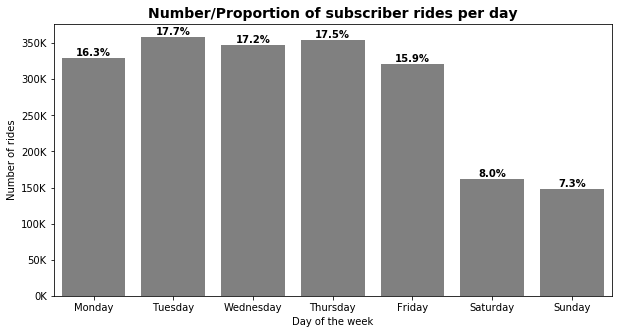

In [44]:
#Selecting subscriber data only
df_subscriber = df.loc[df['user_type'] == 'Subscriber']

#Calculating the number of rides per day
subscriber_day_counts = df_subscriber['start_day'].value_counts()

#Getting the total number of rides in all the days
subscriber_day_users = df_subscriber['start_day'].value_counts().sum()

#Creating the order to be used for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the graph
plt.figure(figsize = (10, 5))
g = sb.countplot(data=df_subscriber, x='start_day', color = 'grey', order = day_order)
plt.title('Number/Proportion of subscriber rides per day', fontsize=14, fontweight ='bold')
plt.xlabel('Day of the week')
plt.ylabel('Number of rides');

# Get the current tick locations and labels
locs, labels = plt.xticks(rotation=0) 

#Formating the y-axis labels
ylabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabels)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = subscriber_day_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/subscriber_day_users)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black', va = 'bottom', fontweight = 'semibold')

**Observations**: Subscribers use the bikes mainly during weekdays for commute to and from work. As a business strategy, partnering with companies in the region can be a way to increase subscribers to increase bikes rides and eventually revenue generated.

**5. Which day/s has the most bikes rides for users who are customers?**

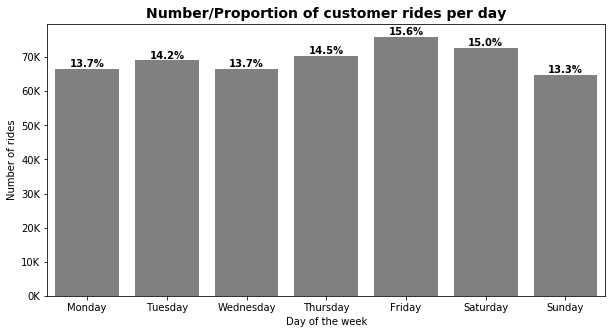

In [45]:
df_customer = df.loc[df['user_type'] == 'Customer']

#Calculating the number of rides per day
customer_day_counts = df_customer['start_day'].value_counts()

#Getting the total number of rides in all the days
customer_day_users = df_customer['start_day'].value_counts().sum()

#Creating the order to be used for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the graph
plt.figure(figsize = (10, 5))
g = sb.countplot(data=df_customer, x='start_day', color = 'grey', order = day_order)
plt.title('Number/Proportion of customer rides per day', fontsize=14, fontweight ='bold')
plt.xlabel('Day of the week')
plt.ylabel('Number of rides');

# Get the current tick locations and labels
locs, labels = plt.xticks(rotation=0) 

#Formating the y-axis labels
ylabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabels)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = customer_day_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/customer_day_users)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black', va = 'bottom', fontweight = 'semibold')

**Observations**: Customers use bikes throughout the week with a slight increase of bikes rides during the weekend period mainly between Friday and Saturday.

**6. What is the rides' trend during the month?**

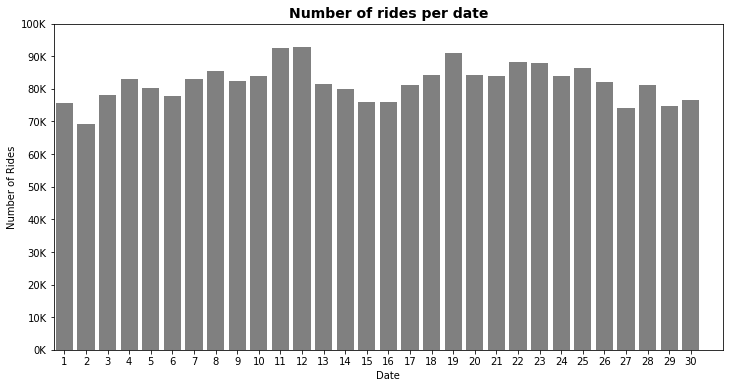

In [46]:
#Selecting only until 30th as some months have 31st and some dont.
df_30 = df.loc[df['start_date'] != 31]

plt.figure(figsize = (12,6))
g = sb.countplot(data = df_30, x = 'start_date', color = 'grey')
plt.title('Number of rides per date', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Rides');

#Setting the step count for the y-axis
step_value = 10000
plt.yticks(np.arange(0, max(df_30.start_date.value_counts())+step_value, step_value))
plt.xticks(np.arange(0, 30, 1))


#Formating the y-axis labels
ylabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabels);

**Observations**: Across the months nin 2019, the first and last few days of the month receive slightly lower rides comapred to the rest of the days in the month. Overally most months have between 70,000 and 90,000 bike rides.

**7. What is the hourly trend for bike rides?**

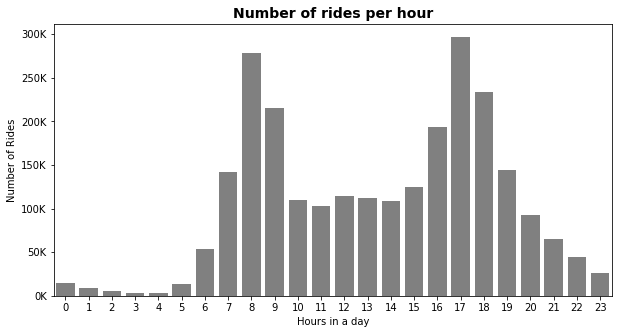

In [47]:
plt.figure(figsize = (10,5))
g = sb.countplot(data = df, x = 'start_hour', color = 'grey')
plt.title('Number of rides per hour', fontsize=14, fontweight='bold')
plt.xlabel('Hours in a day')
plt.ylabel('Number of Rides');

#Formating the y-axis labels
ylabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabels);

**Observation**: Hourly bike rides have a bimodal distribution with peak number of rides during morning hours between 8am and 9am and evening hours between 4pm and 6pm. This coincides with commute hours from home to work and from work to home. We can therefore confidently say that most of the rides are used as means of transport by residents of San Francisco Bay area.

**8. How long does the average trip take?**

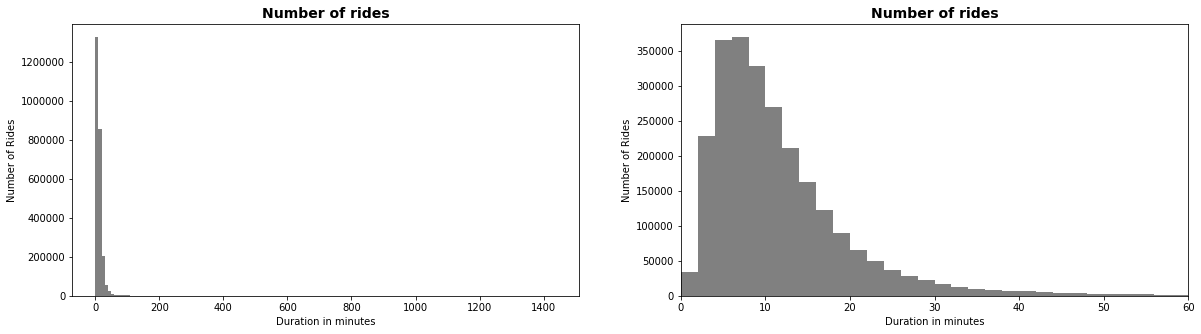

In [48]:
# Resizing the chart to have two plots side-by-side
plt.figure(figsize = [20, 5])

# Plotting the with outliers
plt.subplot(1, 2, 1) 
bins = np.arange(0, df['duration_min'].max()+5, 10)
g = plt.hist(data = df, x = 'duration_min', bins = bins, color = 'grey')
plt.title('Number of rides', fontsize=14, fontweight='bold')
plt.xlabel('Duration in minutes')
plt.ylabel('Number of Rides');

#Plotting without outliers
plt.subplot(1, 2, 2) 
bins = np.arange(0, df['duration_min'].max()+5, 2)
plt.hist(data = df, x = 'duration_min', bins = bins, color = 'grey')
plt.xlim(0,60)
plt.title('Number of rides', fontsize=14, fontweight='bold')
plt.xlabel('Duration in minutes')
plt.ylabel('Number of Rides');


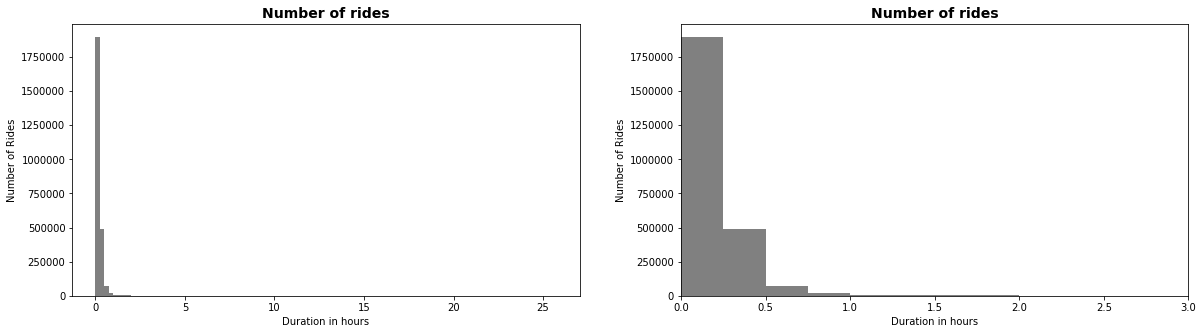

In [49]:
# Resizing the chart to have two plots side-by-side
plt.figure(figsize = [20, 5])

# Plotting the with outliers
plt.subplot(1, 2, 1) 
bins = np.arange(0, df['duration_hours'].max()+2, 0.25)
plt.hist(data = df, x = 'duration_hours', bins = bins, color = 'grey')
plt.title('Number of rides', fontsize=14, fontweight='bold')
plt.xlabel('Duration in hours')
plt.ylabel('Number of Rides');


#Plotting without outliers
plt.subplot(1, 2, 2) 
bins = np.arange(0, df['duration_hours'].max()+2, 0.25)
plt.hist(data = df, x = 'duration_hours', bins = bins, color = 'grey')
plt.xlim(0,3)
plt.title('Number of rides', fontsize=14, fontweight='bold')
plt.xlabel('Duration in hours')
plt.ylabel('Number of Rides');


**Observations**: Most trips are between 5 minutes and 30 minutes. Fewer trips are slightly loger with a duration between 30 minutes and 45 minutes.

### Univariate observation summary

> Upto 80% of the users are subscribers and most take trips during the weekdays. Hourly bike rides has a bimodal distribution with peaks during morning and evening hours. March, April, July, August, September, October are the top 6 months with the highest number of bikes rides. Of importance to note, July through October coincide with summer and autumn which are characterized by warm sunny days and clear nights conducive for tourism.

> Bike ride duration is skewed to the right with most trips taking 30 minutes. Some of the unsual trips were very short such as 60 seconds and long upto around 10 days were removed during cleaning.

<a id='bieda'></a>
## IV. Bivariate Exploration

**9. What is the average bike rides duration between the two user groups?**

In [50]:
df1 = df.loc[df['duration_min'] <= 65]

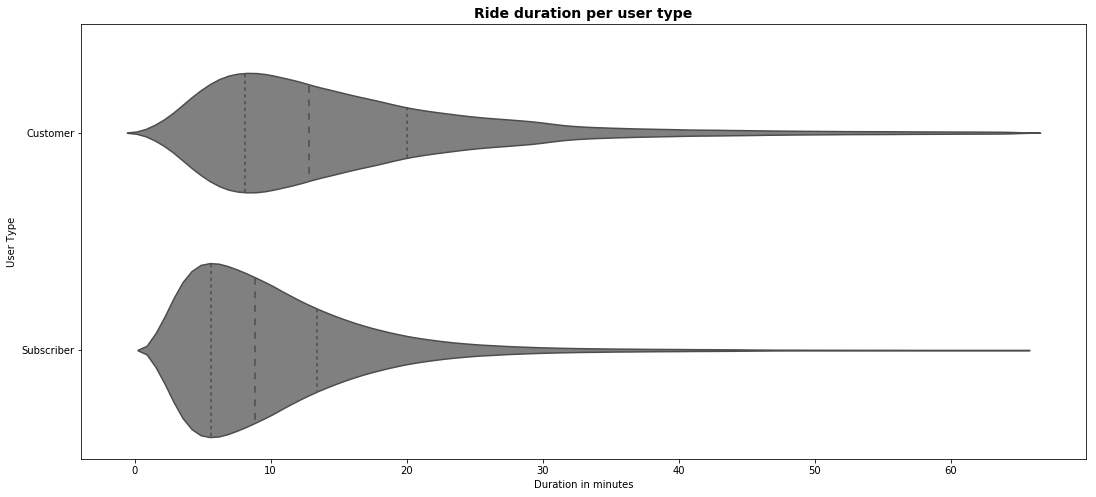

In [51]:
plt.figure(figsize = [18, 8])
sb.violinplot(data = df1, y = 'user_type', x = 'duration_min', 
              color = 'grey', inner = 'quartile')
plt.title('Ride duration per user type', fontsize=14, fontweight='bold')
plt.xlabel('Duration in minutes')
plt.ylabel('User Type');

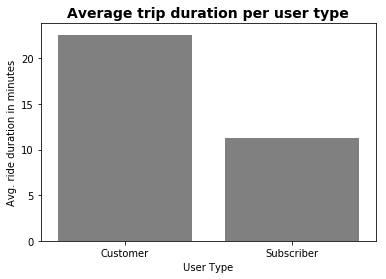

In [52]:
#Average trip duration per user type
sb.barplot(data = df, x = 'user_type', y = 'duration_min', errwidth = 0, color = 'grey')
plt.title('Average trip duration per user type', fontsize=14, fontweight='bold')
plt.ylabel('Avg. ride duration in minutes', fontsize=10)
plt.xlabel('User Type', fontsize=10);

**Observation**: The average customer bike rides was twice as long as the average subscriber bike ride. Customers have a longer average ride duration compared to subscribers.

**10. What is the ride duration distribution across the months?**

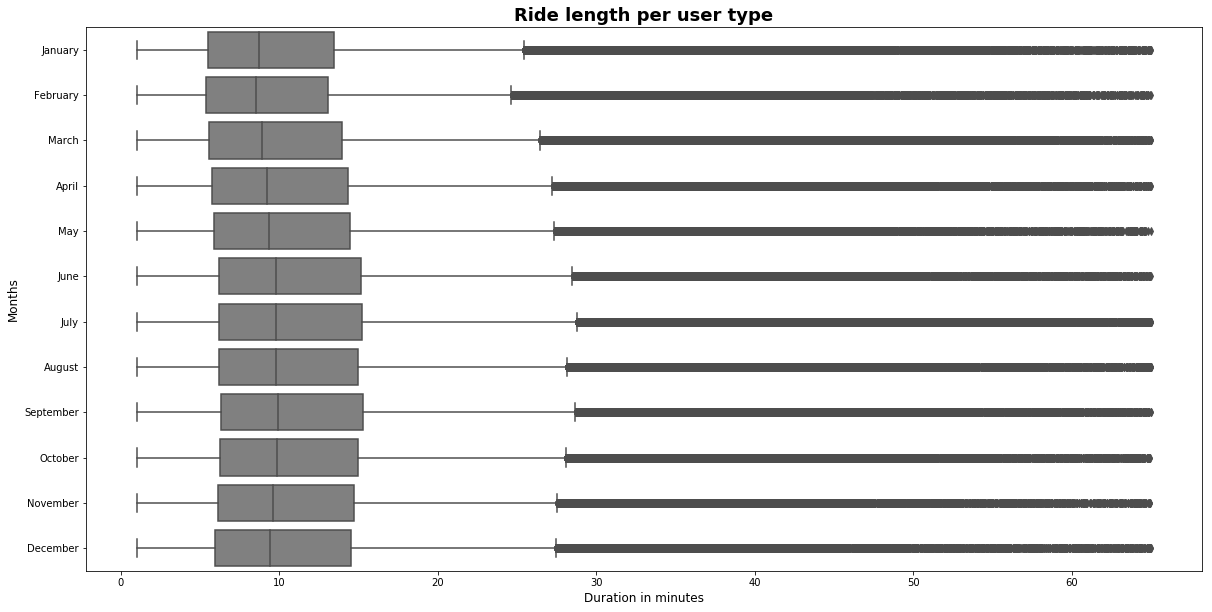

In [53]:
plt.figure(figsize = [20, 10])
sb.boxplot(data = df1, y = 'start_month',  x = 'duration_min', 
              order = month_order, color = 'grey')
plt.title('Ride length per user type', fontsize=18, fontweight='bold')
plt.xlabel('Duration in minutes', fontsize=12)
plt.ylabel('Months', fontsize=12);

**Observation**: There is not much of a difference between ride lengths across the months in 2019. Most trips were above 5 miniutes and less than 15 minutes with several outliers aboce 30 minutes.

**11. What is the ride duration distribution between the days of the week?**

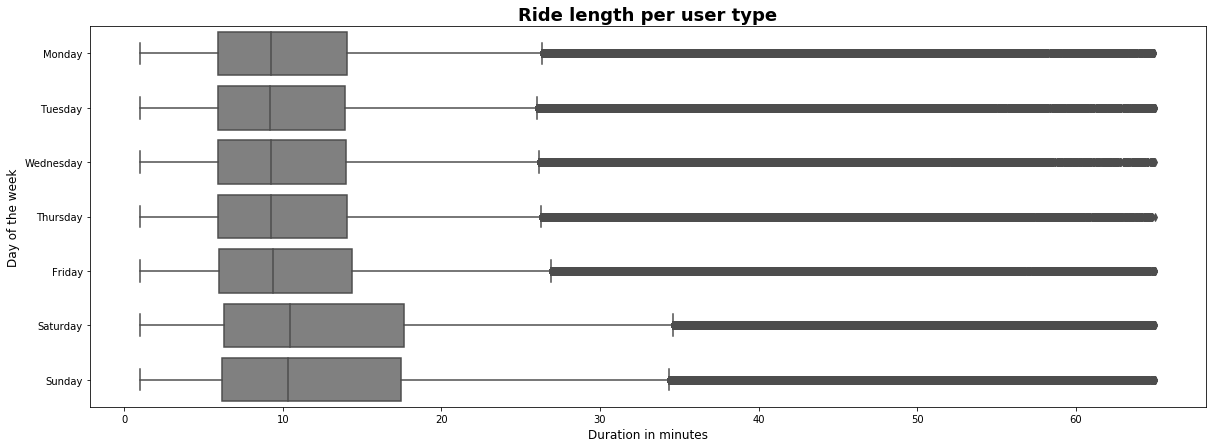

In [54]:
plt.figure(figsize = [20, 7])
sb.boxplot(data = df1, y = 'start_day',  x = 'duration_min', 
              order = day_order, color = 'grey')
plt.title('Ride length per user type', fontsize=18, fontweight='bold')
plt.xlabel('Duration in minutes', fontsize=12)
plt.ylabel('Day of the week', fontsize=12);

**Observation**: There is not much of a difference between ride lengths across the months in 2019. Most trips were above 5 miniutes and less than 15 minutes with several outliers aboce 30 minutes.

**12. What is the distribution across the months between the different users?**

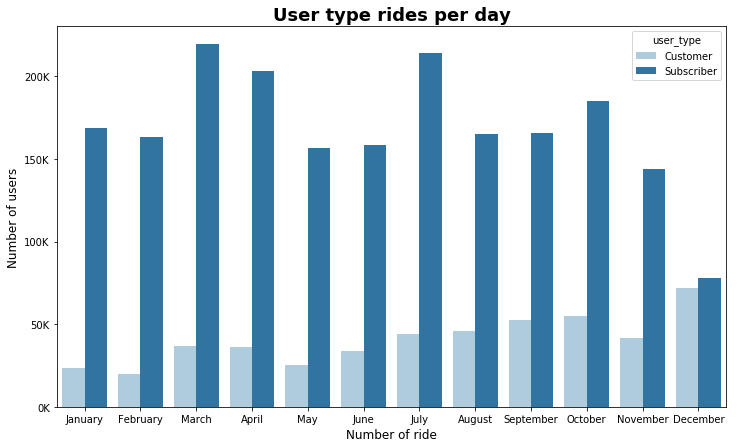

In [55]:
plt.figure(figsize = [12, 7])
g = sb.countplot(data = df, x = 'start_month', hue = 'user_type',
             order = month_order, palette = 'Paired')
plt.title('User type rides per day', fontsize=18, fontweight='bold')
plt.xlabel('Number of ride', fontsize=12)
plt.ylabel('Number of users', fontsize=12);

#Formating the y-axis labels
ylabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabels);

**Observation**: There are more subscriber bike rides comapred to customers across the months but trend is generally the same  between the two user types with the exception of December which has almost similar number of rides between the two groups.

**13. What is the distribution of bike rides per day between the twousers?**

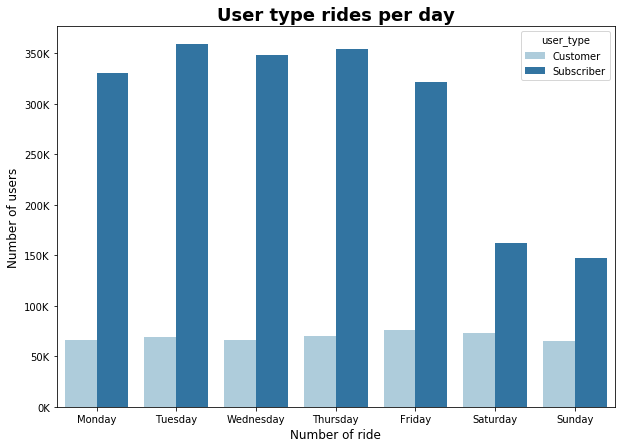

In [56]:
plt.figure(figsize = [10, 7])
g= sb.countplot(data = df, x = 'start_day', hue = 'user_type',
             order = day_order, palette = 'Paired')
plt.title('User type rides per day', fontsize=18, fontweight='bold')
plt.xlabel('Number of ride', fontsize=12)
plt.ylabel('Number of users', fontsize=12);

#Formating the y-axis labels
ylabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabels);

**Observation**: Subscriber bikes rides were significantly lower during the weekends but customer bike rides had a slight increase.

**14. What is the distribution of bike rides per date between the different users?**

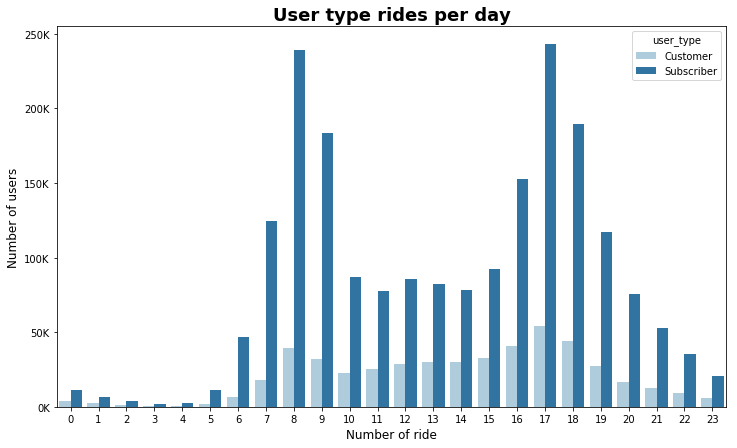

In [57]:
plt.figure(figsize = [12, 7])
g = sb.countplot(data = df, x = 'start_hour', hue = 'user_type' , palette = 'Paired')
plt.title('User type rides per day', fontsize=18, fontweight='bold')
plt.xlabel('Number of ride', fontsize=12)
plt.ylabel('Number of users', fontsize=12);

#Formating the y-axis labels
ylabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabels);

**Observation**: Subscriber and customers have a bimodal distribution of number of bike rides taken per date with peaks from 8th to 9th and 16th to 18th.

**15. What is the distribution of bike rides duration between the two user groups?**

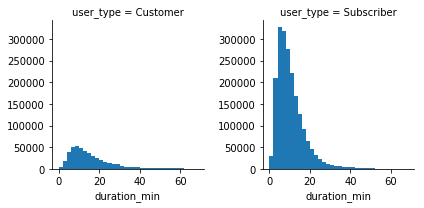

In [58]:
plt.figure(figsize = [10, 7])
bins = np.arange(0, df1['duration_min'].max()+5, 2) 
gr = sb.FacetGrid(data = df1, col = 'user_type');
gr.map(plt.hist, 'duration_min', bins = bins);  

**Observation**: Majority of customer rides were between 10 minutes and 30 minutes while subscriber rides lasted betwee 5 minutes and 20 minutes.

**16. What is the distribution of bike rides duration during the week?**

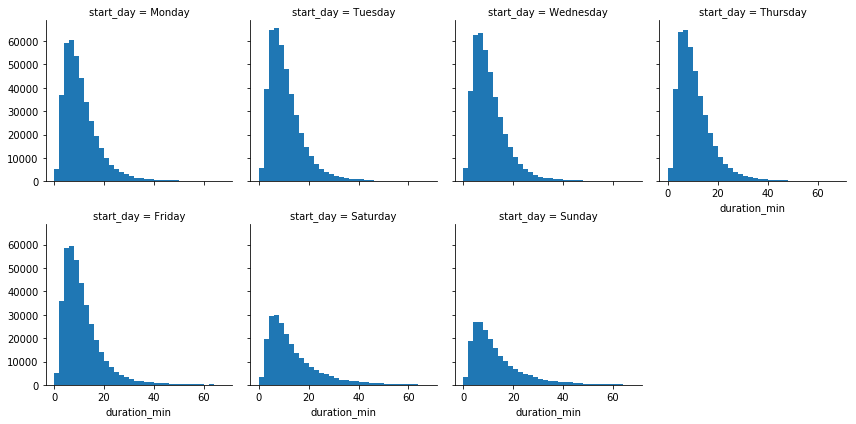

In [59]:
bins = np.arange(0, df1['duration_min'].max()+5, 2) 
gr = sb.FacetGrid(data = df1, col = 'start_day', col_wrap = 4, col_order = day_order);
gr.map(plt.hist, 'duration_min', bins = bins);

**Observation**: There were slightly longer rides during the weekends compared to weekdays.

**17. What is the average bike rides duration across the months?**

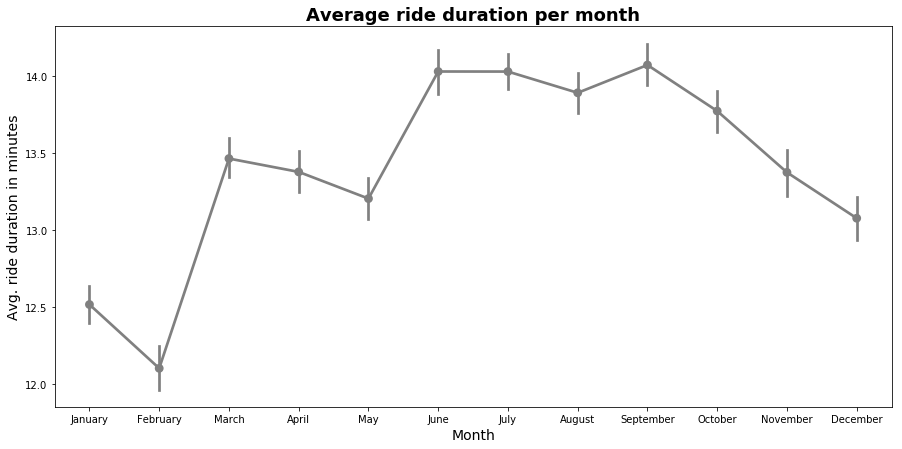

In [60]:
#Average trip duration per month
plt.figure(figsize = (15, 7))
sb.pointplot(data = df, x = 'start_month', y = 'duration_min',order = month_order, color = 'grey')
plt.title('Average ride duration per month', fontsize=18, fontweight='bold')
plt.ylabel('Avg. ride duration in minutes', fontsize=14)
plt.xlabel('Month', fontsize=14);

**Observation**: February had the lowest average bike ride. The highest averages were observed between June 2019 and October 2019 after which there was a drop. This coincides with the summer and autumn seasons during the mid year and winter during the close of the year.

**18. What is the average bike ride duration across the days of the week?**

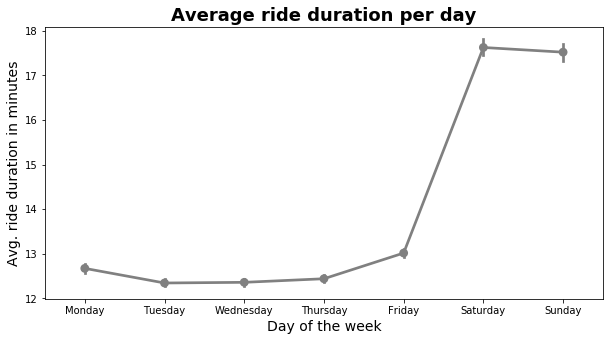

In [61]:
#Average trip duration per day
plt.figure(figsize = (10, 5))
sb.pointplot(data = df, x = 'start_day', y = 'duration_min',order = day_order, color = 'grey')
plt.title('Average ride duration per day', fontsize=18, fontweight='bold')
plt.ylabel('Avg. ride duration in minutes', fontsize=14)
plt.xlabel('Day of the week', fontsize=14);

**Observation**: There is a noteable difference of around 5 minutes between the average bike ride trip during a weekday and weekend. Weekdays seem to have a lower average bike ride as most users are subcribers who use it for commute which tend to be short and quick. During the weekend, longer average bike rides are observed mainly from customers who might be using the bikes leisure.

**19. What is the average bike ride duration across the days of the week?**

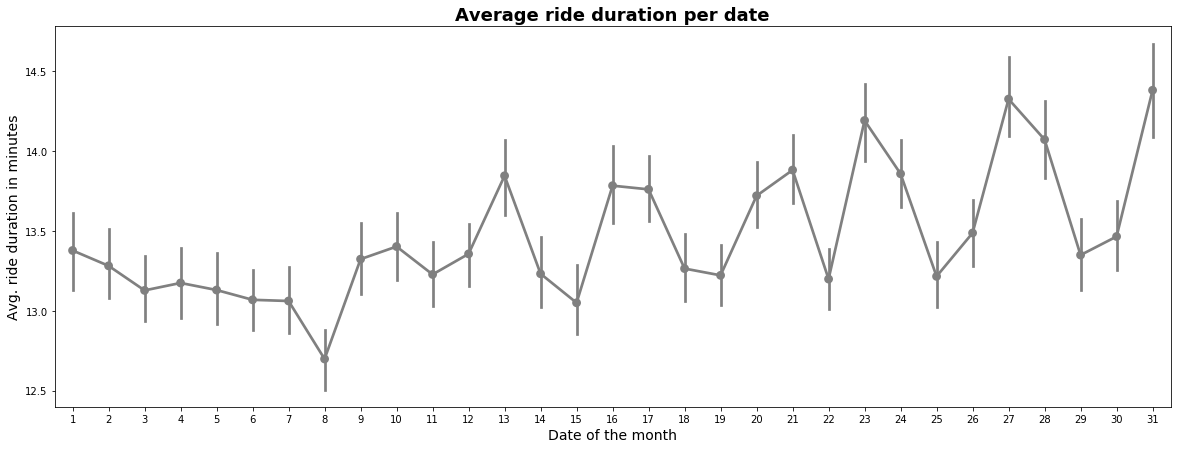

In [62]:
#Average trip duration per day
plt.figure(figsize = (20, 7))
sb.pointplot(data = df, x = 'start_date', y = 'duration_min', color = 'grey')
plt.title('Average ride duration per date', fontsize=18, fontweight='bold')
plt.ylabel('Avg. ride duration in minutes', fontsize=14)
plt.xlabel('Date of the month', fontsize=14);

**Observation**: There is a slight drop of the average bike ride at the start of the month and a sustained variation as the months progressed.

**20. What is the average bike ride duration across hours of a day?**

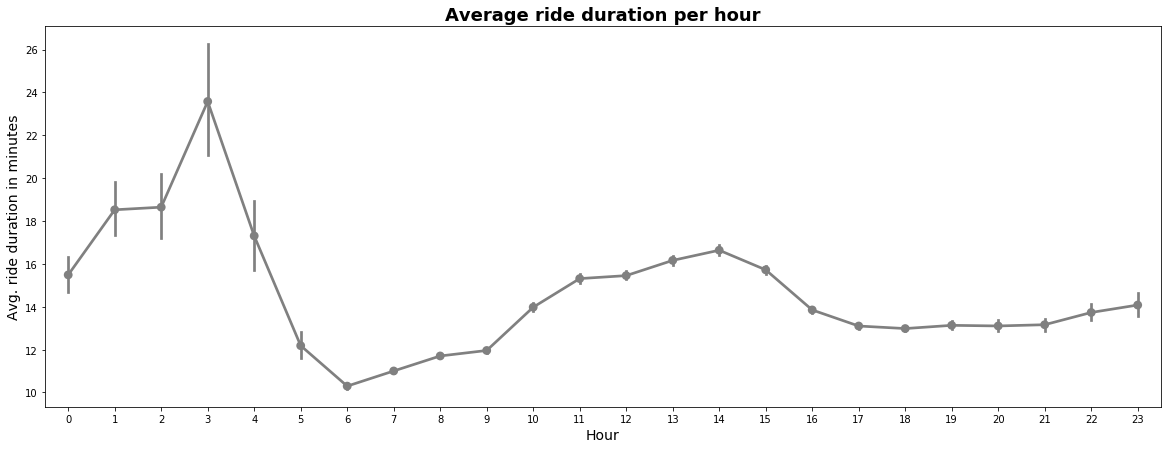

In [63]:
#Average trip duration per day
plt.figure(figsize = (20, 7))
sb.pointplot(data = df, x = 'start_hour', y = 'duration_min', color = 'grey')
plt.title('Average ride duration per hour', fontsize=18, fontweight='bold')
plt.ylabel('Avg. ride duration in minutes', fontsize=14)
plt.xlabel('Hour', fontsize=14);

**Observation**: There were abnormally high from midnight to 4am but with a several outliers present. As the day progressed so did the average bike ride steadily increase as well.

### Bivariate observation summary

> Generally customers have have a higher average bike rides are twice as long as the average subscriber bike ride. There is a steady decline in subscriber rides and steady increase in customer rides as the year progressed with December having almost the same number of rides. 

> Bike ride durations peaked between June and October 2019 and drop as the year came to a close. Most subscribers use bike during weekdays with the rides lasting between 5 and 20 minutes. Customers on the other hand use the bikes throughout with slightly higer average bike ride durations of between 10 and 30 minutes.

> Most trips were take between 7 and 8 am and 4pm and 6pm which coincide with commute hours. Summer and autum months and weekends generally had longer bike rides.

<a id='multieda'></a>
## V. Multivariate Exploration

**21. What is the user type average bike duration across the months?**

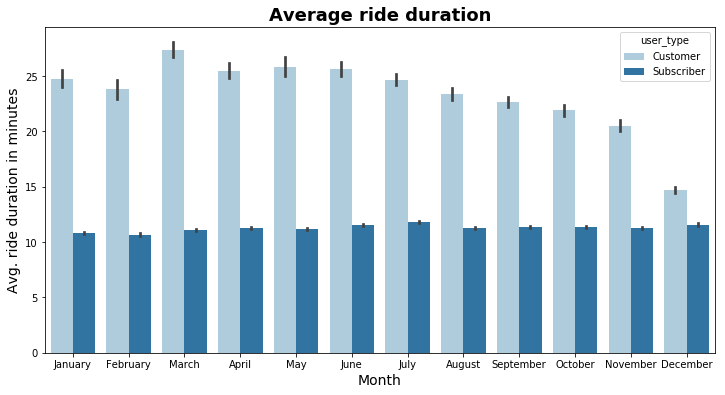

In [64]:
plt.figure(figsize = (12, 6))
sb.barplot(data = df, x = 'start_month', y = 'duration_min',hue = 'user_type',
           order = month_order, palette = 'Paired')
plt.title('Average ride duration', fontsize=18, fontweight='bold')
plt.ylabel('Avg. ride duration in minutes', fontsize=14)
plt.xlabel('Month', fontsize=14);

**Observation**: Over the months, customers had a higher average bike ride duration compared with subscribers. There was a steady marginal decline in the average bike ride duration for customers compared to subscribes who had a stable average throughout the year. December almost had a marginal difference between customer and subscriber bike ride duration.

**22. What is the user type average bike duration in a week?**

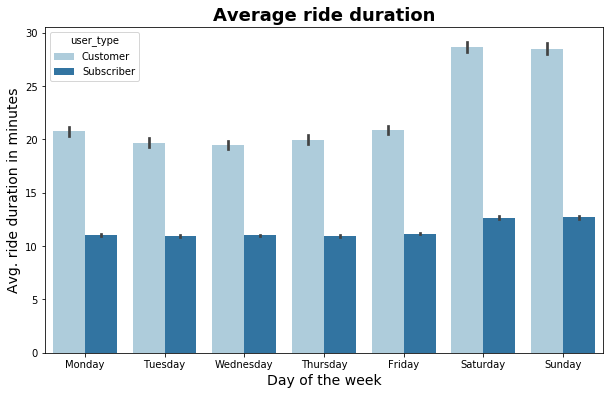

In [65]:
plt.figure(figsize = (10, 6))
sb.barplot(data = df, x = 'start_day', y = 'duration_min',hue = 'user_type', order = day_order, palette = 'Paired')
plt.title('Average ride duration', fontsize=18, fontweight='bold')
plt.ylabel('Avg. ride duration in minutes', fontsize=14)
plt.xlabel('Day of the week', fontsize=14);

**Observation**: Generally, customers had a longer average bike ride duration compared to subscribers. Subscriber bike rides duration remained fairly steady throughout the week compared to subscribers with customers having a significantly longer average bike rides during the weekends.

**23. What is the user type average bike duration in a single day?**

In [ ]:
#Sorting the order of the days of the week
df['start_day'] = pd.Categorical(df['start_day'], categories=day_order, ordered=True)

#Setting the figure sizes
plt.figure(figsize=(20, 15))
# Left plot: Subscriber
plt.subplot(1, 2, 1)
duration_means_s = df.query('user_type == "Subscriber"').groupby(['start_day', 'start_hour']).mean().astype(int)['duration_min']
duration_means_s = duration_means_s.reset_index(name = 'duration_min_avg') 
duration_means_s = duration_means_s.pivot(index = 'start_hour', columns = 'start_day', 
                                      values = 'duration_min_avg')
ax1 = sb.heatmap(duration_means_s, cmap ='PuBu', annot=True, fmt='g', annot_kws={"size": 10}) 
plt.xlabel('Day of week')
plt.ylabel('Hour')
plt.title('Subscriber')
ax1.set_ylim(23.5 + 0.5, 0.5 - 0.5) 


# Right plot: Customer
plt.subplot(1, 2, 2)
duration_means_s = df.query('user_type == "Customer"').groupby(['start_day','start_hour']).mean().astype(int)['duration_min']
duration_means_s = duration_means_s.reset_index(name = 'duration_min_avg') 
duration_means_s = duration_means_s.pivot(index = 'start_hour', columns = 'start_day', 
                                      values = 'duration_min_avg')
ax1 = sb.heatmap(duration_means_s, cmap ='PuBu', annot=True, fmt='g', annot_kws={"size": 10}) 
plt.xlabel('Day of week')
plt.ylabel('Hour')
plt.title('Customer')
ax1.set_ylim(23.5 + 0.5, 0.5 - 0.5) 

(24.0, 0.0)

**Observation**: Both subscribers and customers have abnormally longer trips between 1am and 4am from Monday to Wednesday. Similarly there are longer rides taken over the weekend as well.

### Multivariate observations summary

> Over the months, customers had a higher average bike ride duration compared with subscribers. There was a steady marginal decline in the average bike ride duration for customers compared to subscribes who had a stable average throughout the year. December almost had a marginal difference between customer and subscriber bike ride duration. 

> Generally, customers had a longer average bike ride duration compared to subscribers. Subscriber bike rides duration remained fairly steady throughout the week compared to subscribers with customers having a significantly longer average bike rides during the weekends. 

> Both subscribers and customers have abnormally longer trips between 1am and 4am from Monday to Wednesday. Similarly there are longer rides taken over the weekend as well.

<a id='conclusion'></a>
## VI. Conclusions

- Upto 80% of the users are subscribers and roughly 20% of the users are customers. March, April, July, August, September, October are the top 6 months with the highest number of bikes rides. Of importance to note, July through October coincide with summer and autumn which are characterized by warm sunny days and clear nights conducive for tourism. There are more subscriber bike rides compared to customers across the months but trend is generally the same  between the two user types with the exception of December which has almost similar number of rides between the two groups. Most subsribers take rides during weekdays with a significant drop during the weekend while customer rides are steady throughout the week. Hourly bike rides has a bimodal distribution with peaks during morning and evening hours. 

- Generaly, bike ride duration is skewed to the right with most trips taking 30 minutes. Customers have average bike rides being twice as long as the average subscriber bike ride.Over the months, customers had a higher average bike ride duration compared to subscribers. There was a steady marginal decline in the average bike ride duration for customers compared to subscribes who had a stable average throughout the year. December also had a marginal difference between customer and subscriber bike ride duration. Bike ride durations peaked between June and October 2019 and drop as the year came to a close. Most subscribers use bike during weekdays with the rides lasting between 5 and 20 minutes. Customers on the other hand use the bikes throughout with slightly hihger average bike ride durations of between 10 and 30 minutes. Most trips were take between 7 and 8 am and 4pm and 6pm which coincide with commute hours.

**References**
- https://towardsdatascience.com/stop-persisting-pandas-data-frames-in-csvs-f369a6440af5